In [3]:
# """HARI VYKUNTA KISHORE ABBINA"""

# """ DOGS BREEDS ALLOCATED FOR ME ARE :"""

# """whippet"""

# """Chihuahua"""

# """French_bulldog"""

# """black-and-tan_coonhound"""

In [4]:
# 2(A)
#Cropping and Resize Images in Your 4-class Images Dataset: Use the bounding box information
# in the Annotations dataset relevant to your 4-class Images Dataset to crop the images in your dataset
# and then resize each image to a 128×128 pixel image

import os
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from pathlib import Path
from PIL import Image

def _get_bounding_boxes(annotation_file):
    """Extract bounding boxes from the given XML annotation file."""
    tree = ET.parse(annotation_file)
    root = tree.getroot()
    objects = root.findall('object')

    bounding_boxes = []
    for obj in objects:
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bounding_boxes.append((xmin, ymin, xmax, ymax))
    return bounding_boxes

class ImageProcessor:
    def __init__(self):
        self.base_path = os.getcwd()
        self.image_path = os.path.join(self.base_path, 'Images')
        self.annotation_path = os.path.join(self.base_path, 'Annotation')
        self.cropped_path = os.path.join(self.base_path, 'Cropped')
        self.breeds = [
            'n02085620-Chihuahua',
            'n02089078-black-and-tan_coonhound',
            'n02091134-whippet',
            'n02108915-French_bulldog',
        ]

    def _get_image_path(self, annotation_file):
        """Return the corresponding image path for the given annotation file."""
        image_name = f"{os.path.basename(annotation_file)}.jpg"
        breed_name = os.path.basename(os.path.dirname(annotation_file))
        return os.path.join(self.image_path, breed_name, image_name)

    def _crop_and_save_image(self, image_path, bounding_boxes):
        """Crop the image based on bounding boxes and save the cropped parts."""
        im =Image.open(image_path)
        for idx, box in enumerate(bounding_boxes):
            cropped_image = im.crop(box).resize((100, 100), Image.LANCZOS)
            cropped_image_path = image_path.replace(self.image_path, self.cropped_path)
            directory, _ = os.path.split(cropped_image_path)
            Path(directory).mkdir(parents=True, exist_ok=True)
            cropped_image.convert('RGB').save(cropped_image_path)
            print(f"Saved cropped image to {cropped_image_path}")

    def process(self):
        """Main method to process the images using annotations."""
        annotation_files = [os.path.join(self.annotation_path, breed, fname)
                            for breed in self.breeds
                            for fname in os.listdir(os.path.join(self.annotation_path, breed))
                            if not os.path.isdir(os.path.join(self.annotation_path, breed, fname))]

        for idx, annotation in enumerate(annotation_files, start=1):
            print(f"Processing annotation {idx}/{len(annotation_files)}: {annotation}")
            bounding_boxes = _get_bounding_boxes(annotation)
            image_file_path = self._get_image_path(annotation)

            if not os.path.exists(image_file_path):
                print(f"Image file not found: {image_file_path}")
                continue
                           
            self._crop_and_save_image(image_file_path, bounding_boxes)


processor = ImageProcessor()
processor.process()

Processing annotation 1/657: C:\Users\LENOVO\Desktop\Jupiter Note book\Annotation\n02085620-Chihuahua\n02085620_10074
Saved cropped image to C:\Users\LENOVO\Desktop\Jupiter Note book\Cropped\n02085620-Chihuahua\n02085620_10074.jpg
Processing annotation 2/657: C:\Users\LENOVO\Desktop\Jupiter Note book\Annotation\n02085620-Chihuahua\n02085620_10131
Saved cropped image to C:\Users\LENOVO\Desktop\Jupiter Note book\Cropped\n02085620-Chihuahua\n02085620_10131.jpg
Processing annotation 3/657: C:\Users\LENOVO\Desktop\Jupiter Note book\Annotation\n02085620-Chihuahua\n02085620_10621
Saved cropped image to C:\Users\LENOVO\Desktop\Jupiter Note book\Cropped\n02085620-Chihuahua\n02085620_10621.jpg
Processing annotation 4/657: C:\Users\LENOVO\Desktop\Jupiter Note book\Annotation\n02085620-Chihuahua\n02085620_1073
Saved cropped image to C:\Users\LENOVO\Desktop\Jupiter Note book\Cropped\n02085620-Chihuahua\n02085620_1073.jpg
Processing annotation 5/657: C:\Users\LENOVO\Desktop\Jupiter Note book\Annotat

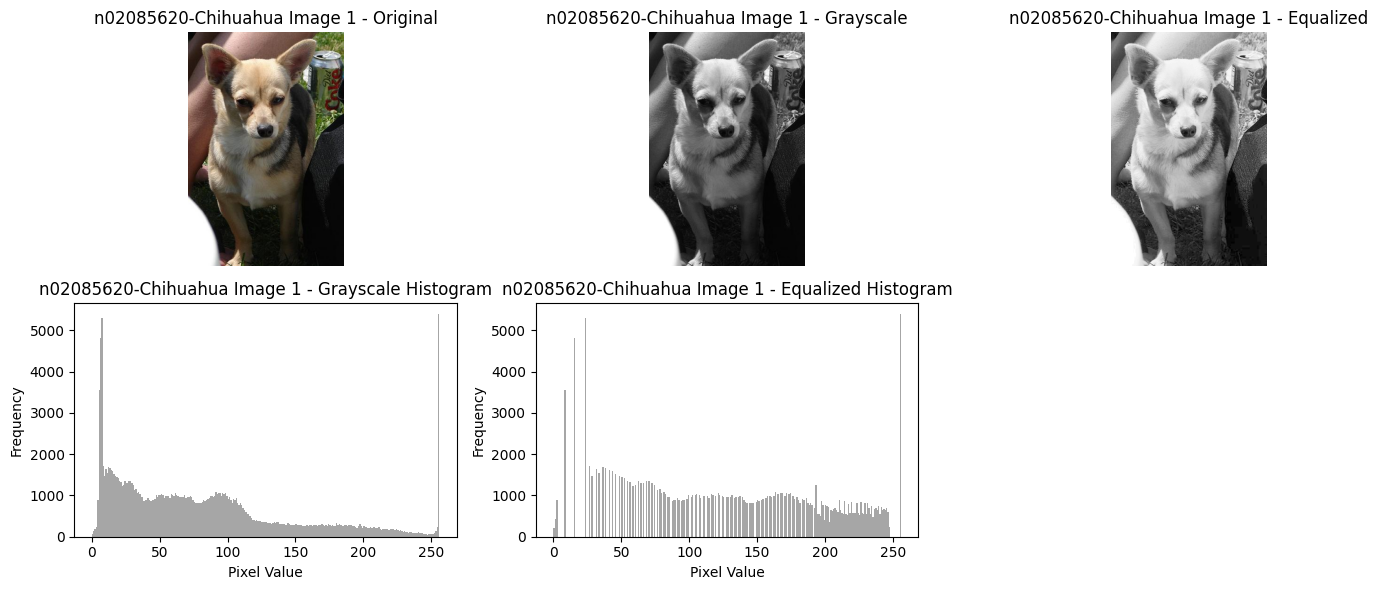

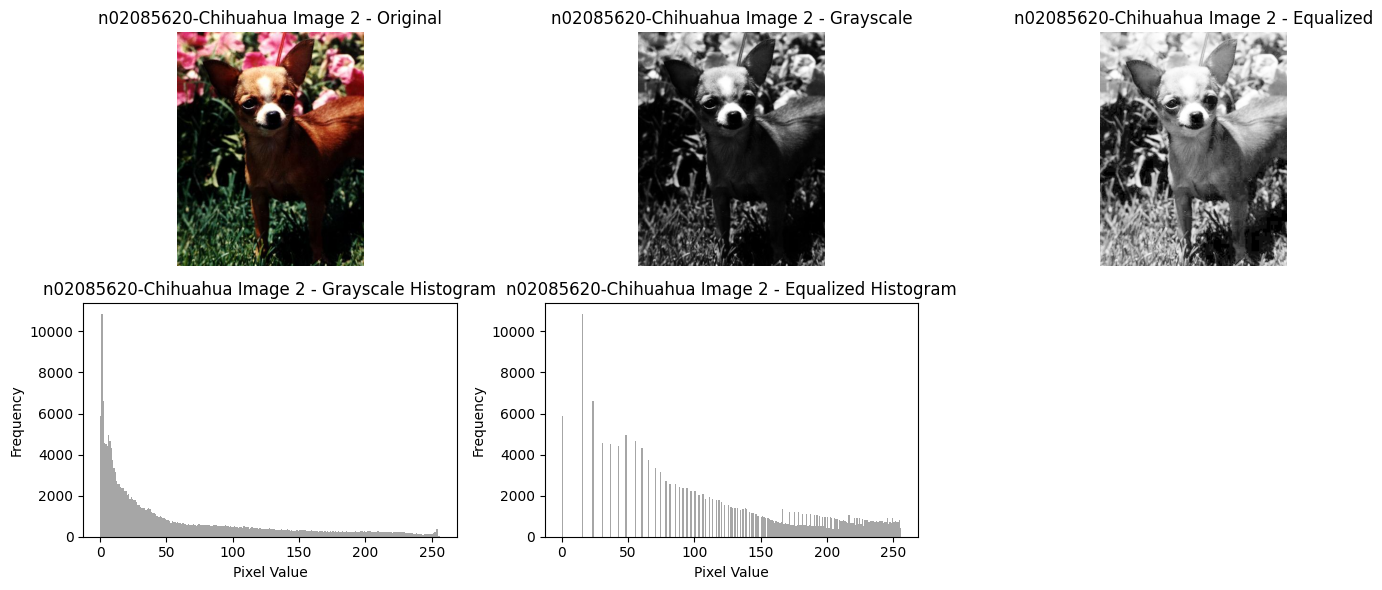

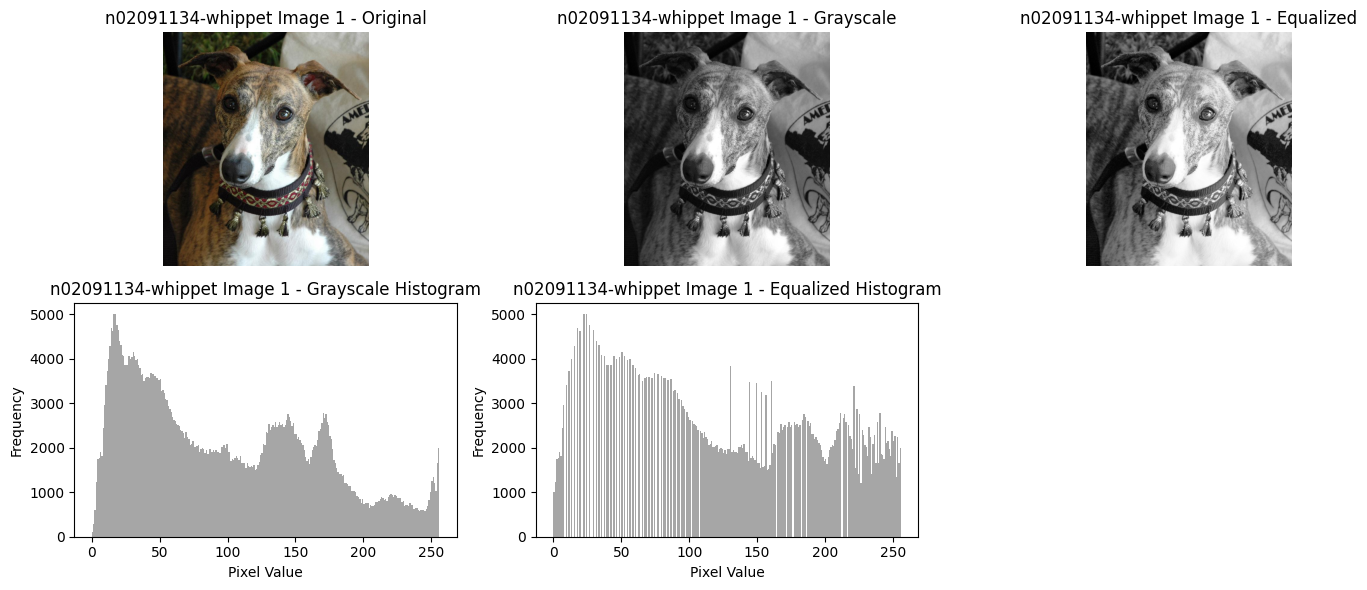

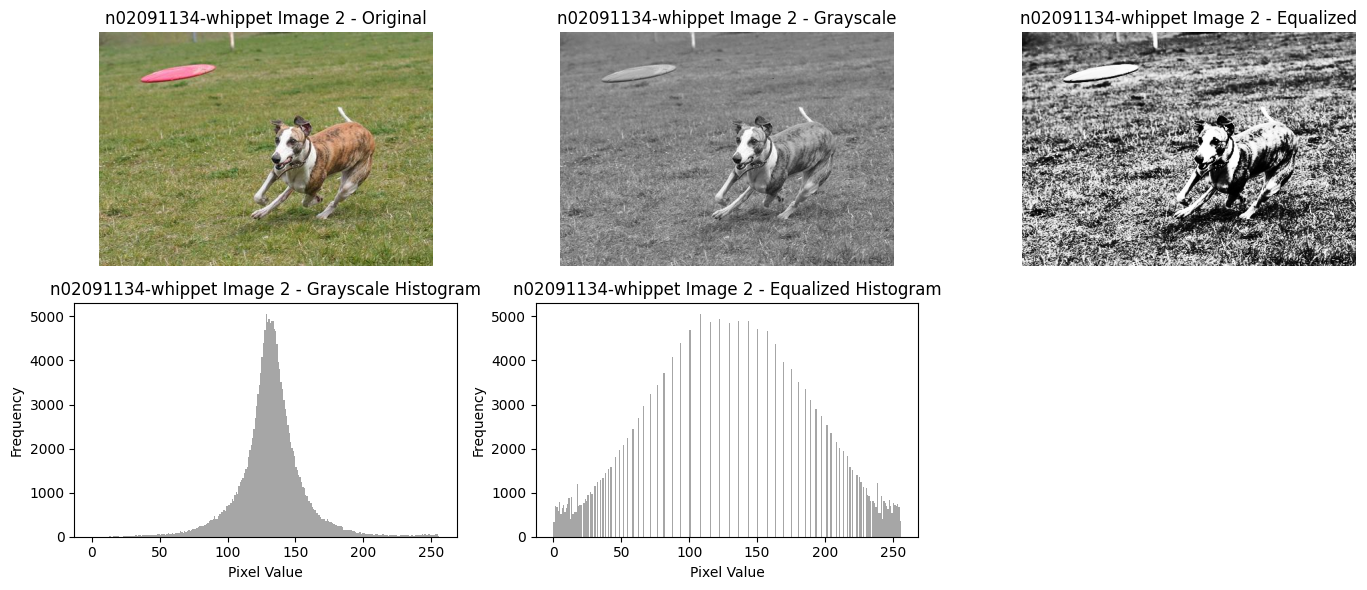

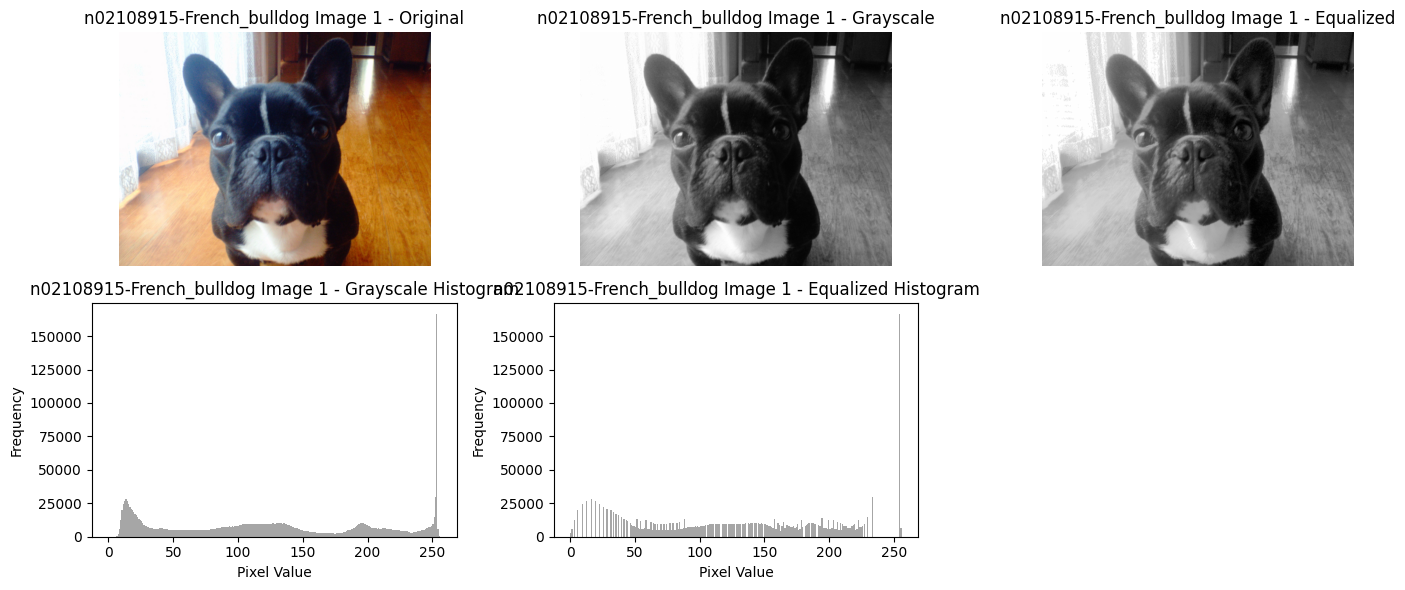

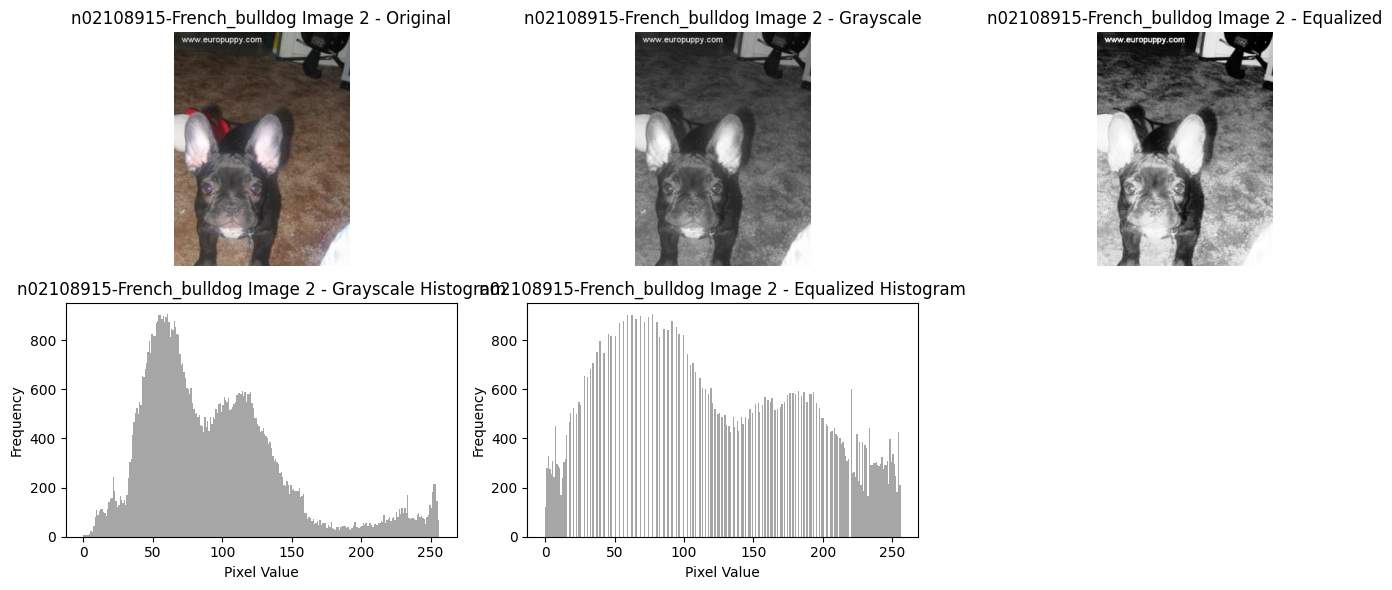

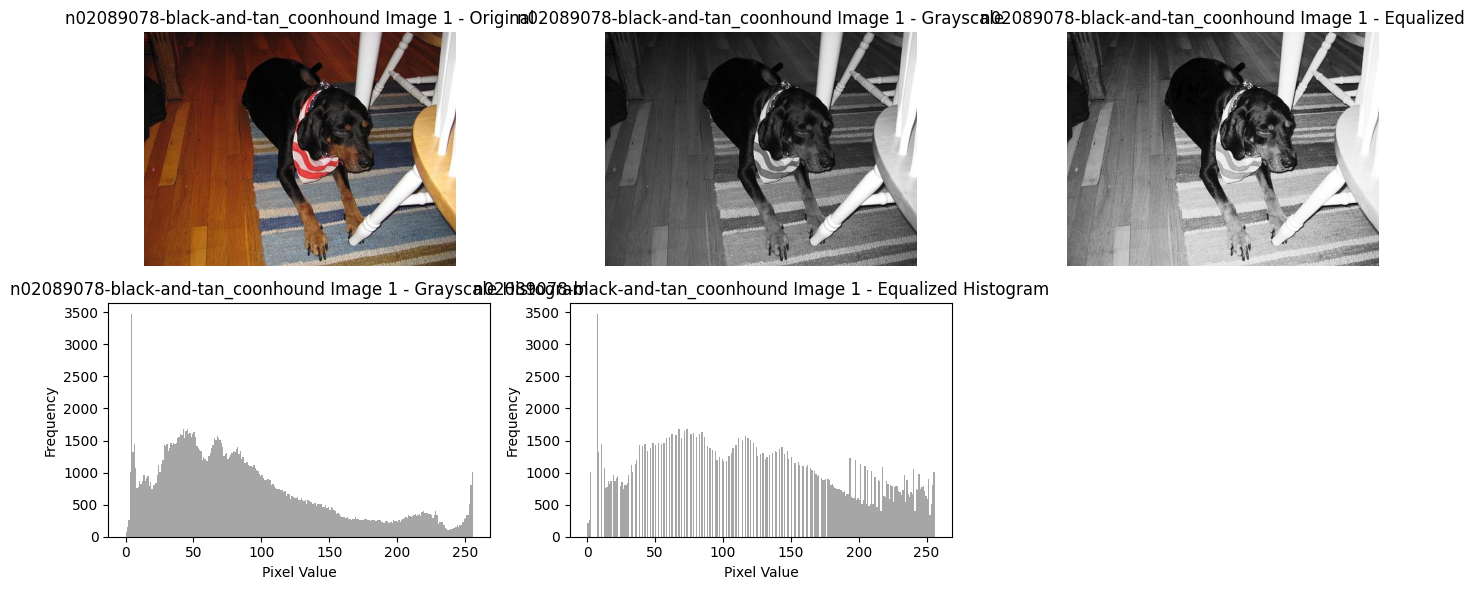

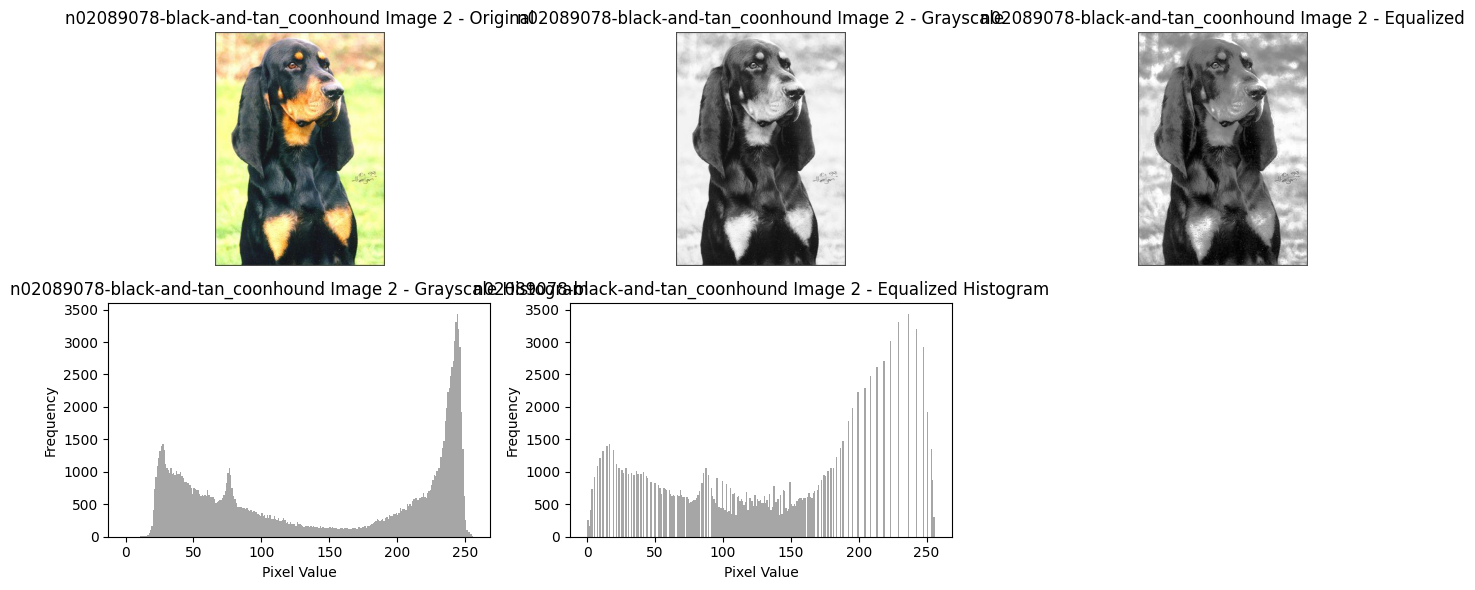

In [9]:
# 2(B)
#Image Processing
# i. Choose 2 images from each class.
# ii. Convert the color images to grayscale images (see https://scikit-image.org/docs/
# stable/auto_examples/color_exposure/plot_rgb_to_gray.html) (MUST use iteration; No points given if no iteration is used) (0.5 point)
# iii. Plot the 8 grayscale images with their corresponding pixel intensity histograms (i.e., 256 bins).
# (1 point)
# iv. Using the 8 grayscale images above, perform edge detection (see https://scikit-image.
# org/docs/stable/auto_examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-filter-py)
# using the sobel edge filter.
# v. Plot the 8 edge images as shown in https://scikit-image.org/docs/stable/auto_
# examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-filter-py.
# (1 point)

import cv2
import matplotlib.pyplot as plt
import os

class ImageHandler:
    def __init__(self, folders):
        self.folders = folders

    def fetch_images_from_directory(self, directory, count=2):
        """Retrieve a specified number of images from a given directory."""
        image_files = [file for file in os.listdir(directory) if file.endswith('.jpg')]
        images = []
        for img in image_files[:count]:
            img_path = os.path.join(directory, img)
            image = cv2.imread(img_path)
            images.append(image)
        return images

    def convert_to_grayscale(self, images):
        """Convert provided color images to grayscale."""
        grayscale_images = []
        for img in images:
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            grayscale_images.append(gray_image)
        return grayscale_images

    def equalize_histograms(self, grayscale_images):
        """Perform histogram equalization on provided grayscale images."""
        equalized_images = []
        for img in grayscale_images:
            equalized_image = cv2.equalizeHist(img)
            equalized_images.append(equalized_image)
        return equalized_images

    def plot_comparison(self, original, grayscale, equalized, title):
        """Plot comparison of original, grayscale, and equalized images."""
        plt.figure(figsize=(14, 6))

        plt.subplot(2, 3, 1)
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        plt.title(f"{title} - Original")
        plt.axis('off')

        plt.subplot(2, 3, 2)
        plt.imshow(grayscale, cmap='gray')
        plt.title(f"{title} - Grayscale")
        plt.axis('off')

        plt.subplot(2, 3, 3)
        plt.imshow(equalized, cmap='gray')
        plt.title(f"{title} - Equalized")
        plt.axis('off')

        plt.subplot(2, 3, 4)
        plt.hist(grayscale.ravel(), 256, [0, 256], color='gray', alpha=0.7)
        plt.title(f"{title} - Grayscale Histogram")
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')

        plt.subplot(2, 3, 5)
        plt.hist(equalized.ravel(), 256, [0, 256], color='gray', alpha=0.7)
        plt.title(f"{title} - Equalized Histogram")
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def process_images(self):
        for folder in self.folders:
            images = self.fetch_images_from_directory(folder)
            grayscale_images = self.convert_to_grayscale(images)
            equalized_images = self.equalize_histograms(grayscale_images)

            for idx, title in enumerate(["Image 1", "Image 2"]):
                self.plot_comparison(images[idx], grayscale_images[idx], equalized_images[idx], f"{os.path.basename(folder)} {title}")

directories = [
    "Images/n02085620-Chihuahua",
    "Images/n02091134-whippet",
    "Images/n02108915-French_bulldog",
    "Images/n02089078-black-and-tan_coonhound"
]

handler = ImageHandler(directories)
handler.process_images()


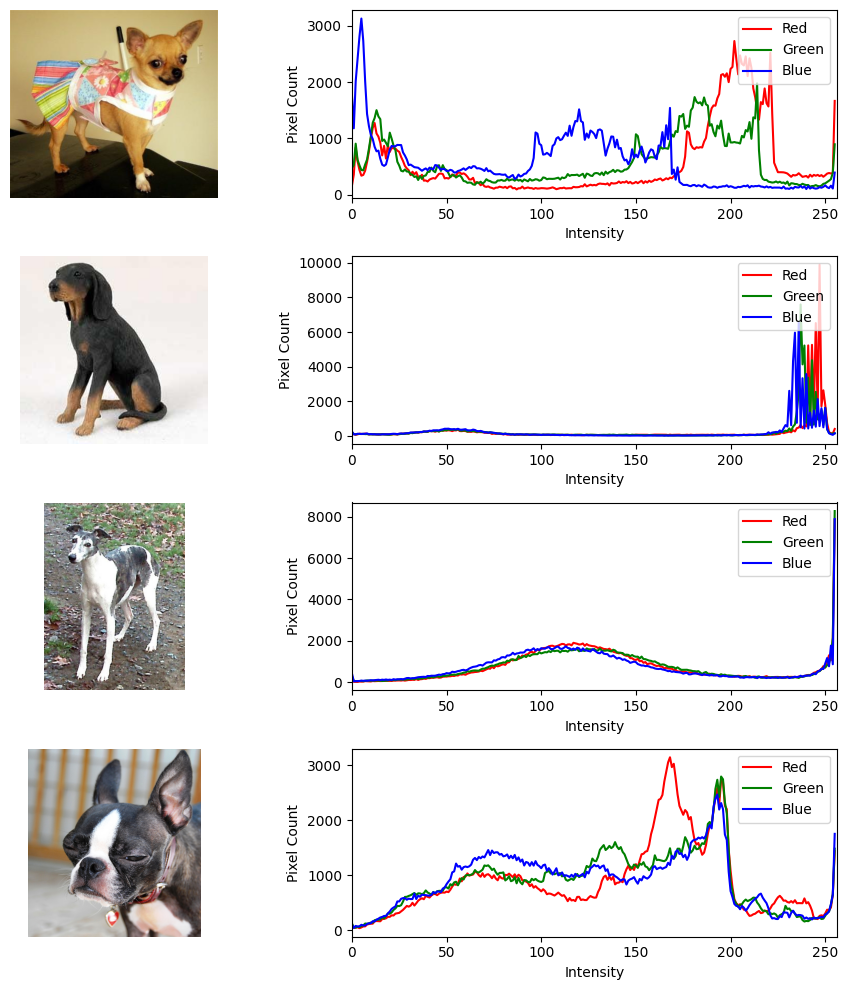

In [14]:
# 2(C)
#Edge histogram
# i. Choose 1 image from each class.
# ii. Convert the color images to grayscale images
# iii. For each image 𝐼, use the following
# import numpy as np
# from skimage import filters
# def angle(dx, dy):
# """Calculate the angles between horizontal and vertical operators."""
# return np.mod(np.arctan2(dy, dx), np.pi)
# angle_sobel = angle(filters.sobel_h(I),
# filters.sobel_v(I))
# to obtain an “angle” for each pixel in the images (Intuitively, one can think of the “angle” as
# the direction of edge gradient at the pixel).
# iv. Use skimage.exposure.histogram (see https://scikit-image.org/docs/stable/api/
# skimage.exposure.html#skimage.exposure.histogram) to obtain a histogram with 36
# bins. (1 point)
# v. Plot the images with their corresponding edge histogram values (add x-axis label “Bins” and
# y-axis label “Pixel Count” ). (1 point)

import os
from PIL import Image
import matplotlib.pyplot as plt

class ImageVisualizer:
    def __init__(self, base_directory):
        self.base_directory = base_directory

    def _get_image_paths(self):
        "Retrieve paths of specific images from different classes."
        images_subdir = os.path.join(self.base_directory, 'Images')
        specific_images = [
            ('n02085620-Chihuahua', 'n02085620_949.jpg'),
            ('n02089078-black-and-tan_coonhound', 'n02089078_695.jpg'),
            ('n02091134-whippet', 'n02091134_835.jpg'),
            ('n02108915-French_bulldog', 'n02108915_481.jpg')
        ]
        return [os.path.join(images_subdir, category, img_name) for category, img_name in specific_images]
     
    def _extract_rgb_histograms(self, image):
        """RGB histograms"""
        histogram = image.histogram()
        red_hist = histogram[0:256]
        green_hist = histogram[256:512]
        blue_hist = histogram[512:768]
        return red_hist, green_hist, blue_hist
    
    def display_image_histograms(self):
        " images with RGB histograms"
        image_paths = self._get_image_paths()
        num_images = len(image_paths)
        fig, axes = plt.subplots(num_images, 2, figsize=(10, 10))
     
        for idx, img_path in enumerate(image_paths):
            image = Image.open(img_path)
        
            # Display the image
            axes[idx, 0].imshow(image)
            axes[idx, 0].axis('off')
 
            # Extract and plot RGB histograms
            red_hist, green_hist, blue_hist = self._extract_rgb_histograms(image)
            axes[idx, 1].plot(red_hist, color='red', label='Red')
            axes[idx, 1].plot(green_hist, color='green', label='Green')
            axes[idx, 1].plot(blue_hist, color='blue', label='Blue')
            axes[idx, 1].set_xlim([0, 256])
            axes[idx, 1].legend(loc="upper right")
            axes[idx, 1].set_xlabel('Intensity')
            axes[idx, 1].set_ylabel('Pixel Count')

        plt.tight_layout()
        plt.show()

# Usage:
visualizer = ImageVisualizer(os.getcwd())
visualizer.display_image_histograms()


In [18]:
#2(D)
#Histogram Comparison (Measures of Similarity and Dissimilarity)(see https://scikit-learn.
# org/stable/modules/classes.html#module-sklearn.metrics.pairwise)
# i. Pick 2 images from the same class and 1 image from another class.
# ii. Convert the three images to edge histograms. (These will be the vector representations of the
# images)
# iii. Perform histogram comparison using the following metrics/measures.
# • Euclidean distance
# 2
# • Manhattan distance
# • Cosine distance
# Using the 3 images above, you will compare histograms by computing the metrics/measures
# of (1) the 2 images from the same class, AND (2) 2 images from different classes. (1.5 points)

import numpy as np
import cv2

class HistogramAnalyzer:
    def __init__(self, image_path):
        self.image_path = image_path
        self.histogram = self._compute_histogram()

    def _compute_histogram(self):
        """Calculate normalized histogram for the image."""
        img = cv2.imread(self.image_path, 0)  # Load image in grayscale
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        return hist.ravel() / hist.sum()

    def euclidean_distance(self, other_hist):
        """Calculate the Euclidean distance between histograms."""
        return np.linalg.norm(self.histogram - other_hist)

    def manhattan_distance(self, other_hist):
        """Calculate the Manhattan distance between histograms."""
        return np.sum(np.abs(self.histogram - other_hist))

    def bhattacharyya_distance(self, other_hist):
        """Calculate the Bhattacharyya distance between histograms."""
        return -np.log(np.sum(np.sqrt(self.histogram * other_hist)))

    def histogram_intersection_value(self, other_hist):
        """Calculate the histogram intersection value between histograms."""
        return np.sum(np.minimum(self.histogram, other_hist))

def display_comparison(image1, image2, title):
    """Display comparison metrics between two images."""
    print(title)
    print("Euclidean Distance:", image1.euclidean_distance(image2.histogram))
    print("Manhattan Distance:", image1.manhattan_distance(image2.histogram))
    print("Bhattacharyya Distance:", image1.bhattacharyya_distance(image2.histogram))
    print("Histogram Intersection:", image1.histogram_intersection_value(image2.histogram))
    print()

# Image paths
chihuahua1_path = "Images/n02085620-Chihuahua/n02085620_368.jpg"
chihuahua2_path = "Images/n02085620-Chihuahua/n02085620_712.jpg"
whippet_path = "Images/n02091134-whippet/n02091134_1268.jpg"

# Create HistogramAnalyzer instances for each image
chihuahua1 = HistogramAnalyzer(chihuahua1_path)
chihuahua2 = HistogramAnalyzer(chihuahua2_path)
whippet = HistogramAnalyzer(whippet_path)

# Display comparisons
display_comparison(chihuahua1, chihuahua2, "Comparing images from the same class:")
display_comparison(chihuahua1, whippet, "Comparing images from different classes:")


Comparing images from the same class:
Euclidean Distance: 0.090069994
Manhattan Distance: 0.88200045
Bhattacharyya Distance: 0.19498616
Histogram Intersection: 0.5589997

Comparing images from different classes:
Euclidean Distance: 0.052644663
Manhattan Distance: 0.66685843
Bhattacharyya Distance: 0.097550854
Histogram Intersection: 0.6665708




whippet


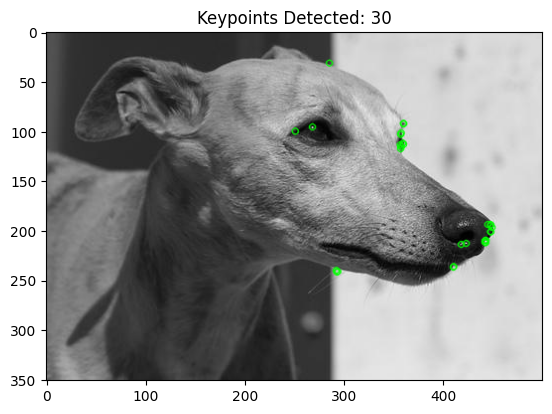

keypoints detected for this image: 30
Edge Threshold used: 15
PatchSize used: 15

Chihuahua


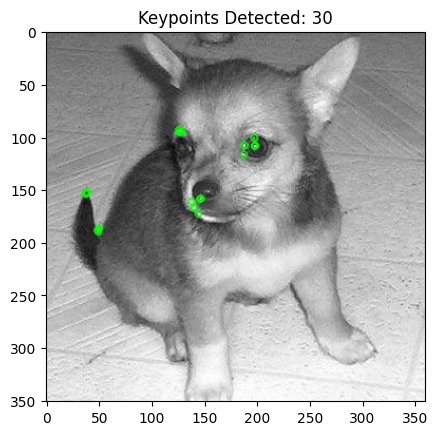

keypoints detected for this image: 30
Edge Threshold used: 15
PatchSize used: 15

French_bulldog


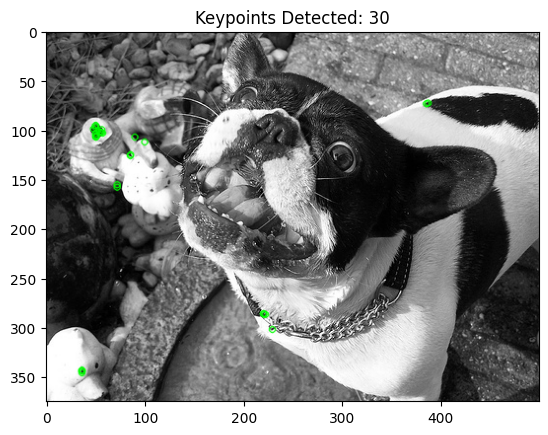

keypoints detected for this image: 30
Edge Threshold used: 15
PatchSize used: 15
\Black-and-tan_coonhound


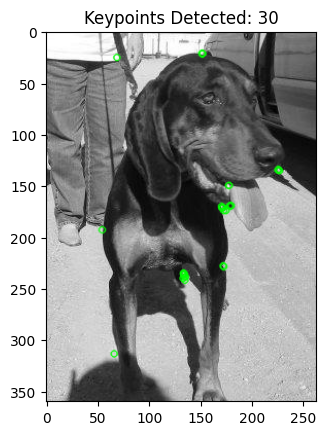

keypoints detected for this image: 30
Edge Threshold used: 15
PatchSize used: 15


In [30]:
#2(E)
#) Histogram of Oriented Gradient (HOG) feature descriptor (see https://en.wikipedia.
# org/wiki/Histogram_of_oriented_gradients)
# i. Pick 1 image and compute its HOG descriptors. Visualise the image and the HOG descriptors
# for the image (see https://scikit-image.org/docs/stable/auto_examples/features_
# detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)
# (1 point)

import cv2
import matplotlib.pyplot as plt

class ORBKeypointExtractor:
    def __init__(self, image_path):
        self.image = cv2.imread(image_path)
        self.gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        self.edge_threshold = 15
        self.patch_size = 15

    def _tune_parameters(self):
        """Iteratively adjust parameters to get a desired number of keypoints."""
        max_iterations = 50
        iteration = 0
        
        while iteration < max_iterations:
            orb = cv2.ORB_create(edgeThreshold=self.edge_threshold,
                                 patchSize=self.patch_size,
                                 nlevels=8,
                                 fastThreshold=20,
                                 scaleFactor=1.2,
                                 WTA_K=2,
                                 scoreType=cv2.ORB_HARRIS_SCORE,
                                 firstLevel=0,
                                 nfeatures=30)
            
            keypoints = orb.detect(self.gray_image, None)

            if 25 <= len(keypoints) <= 75:
                return keypoints

            if len(keypoints) < 25:
                self.edge_threshold -= 1
            else:
                self.edge_threshold += 1

            self.patch_size = self.edge_threshold
            iteration += 1

        return keypoints  # Moved inside the while loop

    def display_keypoints(self):
        """Display the image with keypoints marked."""
        keypoints = self._tune_parameters()
        output_image = cv2.drawKeypoints(self.gray_image, keypoints, self.image, color=(0, 255, 0))

        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Keypoints Detected: {len(keypoints)}")
        plt.show()

        print(f"keypoints detected for this image: {len(keypoints)}")
        print(f"Edge Threshold used: {self.edge_threshold}")
        print(f"PatchSize used: {self.patch_size}")

print("\nwhippet")
whippet_image1 = ORBKeypointExtractor("Images/n02091134-whippet/n02091134_232.jpg")
whippet_image1.display_keypoints()


print("\nChihuahua")
whippet_image1 = ORBKeypointExtractor("Images/n02085620-Chihuahua/n02085620_1271.jpg")
whippet_image1.display_keypoints()


print("\nFrench_bulldog")
whippet_image1 = ORBKeypointExtractor("Images/n02108915-French_bulldog/n02108915_160.jpg")
whippet_image1.display_keypoints()


print("\Black-and-tan_coonhound")
whippet_image1 = ORBKeypointExtractor("Images/n02089078-black-and-tan_coonhound/n02089078_222.jpg")
whippet_image1.display_keypoints()


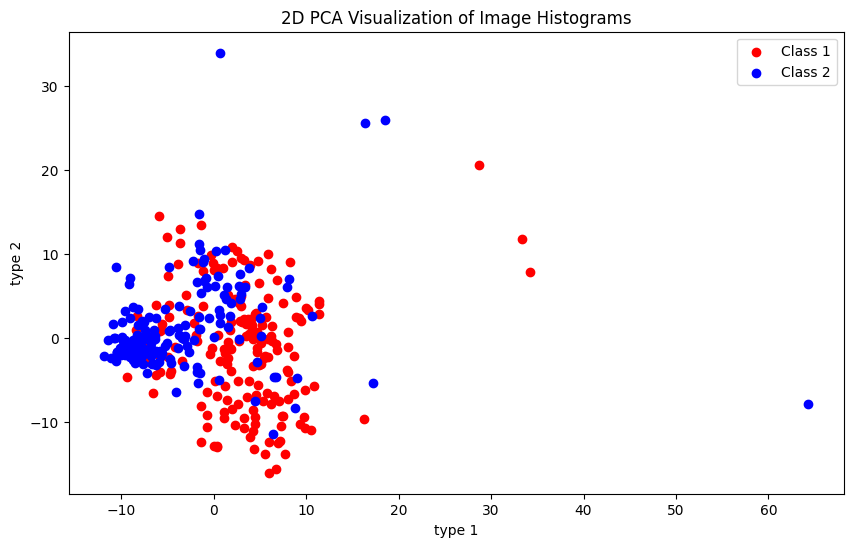

In [1]:
#2(F) 
#Dimensionality reduction (using Principal Component Analysis, PCA)(see https://scikit-learn.
# org/stable/modules/generated/sklearn.decomposition.PCA.html for PCA. https://
# scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html for code
# example. We will use scikit learn more extensively in the next assignment)
# i. Use images from any two classes.
# ii. Convert all the images from the two classes to edge histograms.(0.5 points)
# iii. Perform Principal Component Analysis (PCA) dimensionality reduction on the set of histograms to reduce from 36 to 2 dimensions. (Note: You should not use the class labels) (1
# point)
# iv. Plot the 2D points using 2 different colors for data from the 2 classes (see Figure 1). Are your
# data from the two classes separable? (1 point)

import cv2
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class ImageHistogramPCA:
    def __init__(self, folder_paths):
        self.folder_paths = folder_paths
    
    def _compute_histogram(self, image):
     
        grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        histogram = cv2.calcHist([grayscale], [0], None, [256], [0, 256])
        return histogram.ravel()
    
    def _load_histograms(self):
        
        histograms_data = []
        for folder_path in self.folder_paths:
            for filename in os.listdir(folder_path):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                hist = self._compute_histogram(image)
                histograms_data.append(hist)
        return histograms_data
    
    def _visualize_pca(self, transformed_data):
       
        class_sizes = [len(os.listdir(folder_path)) for folder_path in self.folder_paths]
        class_labels = ['Class 1'] * class_sizes[0] + ['Class 2'] * class_sizes[1]
        
        plt.figure(figsize=(10, 6))
        for class_label, color in zip(set(class_labels), ['r', 'b']):
            class_indices = [idx for idx, label in enumerate(class_labels) if label == class_label]
            plt.scatter(transformed_data[class_indices, 0], transformed_data[class_indices, 1], c=color, label=class_label)
        plt.xlabel('type 1')
        plt.ylabel('type 2')
        plt.title('2D PCA Visualization of Image Histograms')
        plt.legend()
        plt.show()

    def visualize_pca(self):

        histograms = self._load_histograms()
        
        # Normalize the data
        histograms = StandardScaler().fit_transform(histograms)

        # Apply PCA for dimensionality reduction to 2D
        pca_processor = PCA(n_components=2)
        transformed_data = pca_processor.fit_transform(histograms)

        # Visualize PCA results
        self._visualize_pca(transformed_data)
                    
class1_path = "Images/n02091134-whippet"
class2_path = "Images/n02089078-black-and-tan_coonhound"
folder_paths = [class1_path, class2_path]

pca_visualizer = ImageHistogramPCA(folder_paths)
pca_visualizer.visualize_pca()
